<a href="https://colab.research.google.com/github/kimdain0222/deep_learning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_4%EC%A3%BC%EC%B0%A8(%EA%B5%90%EC%88%98ver)mlp_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

- **MLP 구조**
> - **input layer node**:  2
> - **hidden layer node**: 4
> - **output layer node**: 3
> - `ex>` `체온,혈압`(**2개 입력**)을 통해 `정상,코로나,감기`(**3개 출력**)를 분류하는 모델
> - 입력 `X`는 총 5개의 sample로 구성됨 <br>
`X.shape = (sample의 수, 특징의 수) = (sample의 수, input layer node의 수) = (5,2)` = (행.열)

A.dot(B) → 결과 shape = (A의 행, B의 열)

In [ ]:
X = np.array([[0,1],
              [1,0],
              [1,1],
              [-1,0],
              [-1,-1]])
print(X.shape)

(5, 2)


- 가중치(W):  레이어 사이를 연결하는 다리
- 편향(b): 각 뉴런의 고유 성향
- `W1`: input layer(입력층)와 hidden layer(은닉층) 사이의 가중치
- `b1`: hidden layer node(은닉층)의 편향
- `W2`: hidden laye(은닉층)r와 ouput layer(출력층) 사이의 가중치
- `b2`: output layer node(출력층 편향)의 편향
- `W.shape` = **(출발 layer node의 수, 도착 layer node의 수)**
- `b.shape` = **(layer node의 수)**

- `W1.shape = (2,4)`2차원 -대괄호가 두 개
- `b1.shape = (4, )`1차원 -한 줄로만/행,열 개념없음
- `W2.shape = (4,3)`2차원
- `b2.shape = (3, )`1차원

In [ ]:
W1 = np.array([[0.5,-0.2,0.7,-0.8],
               [-0.3,0.2,0.5,-0.1]])
b1 = np.array([0.5,-0.2,-0.3,0.7])
W2 = np.array([[-0.3,-0.2,0.6],
               [0.2,0.3,-0.5],
               [-0.7,0.3,0.3],
               [0.6,-0.5,-0.1]])
b2 = np.array([-0.3,0.8,-0.6])
print(W1.shape, b1.shape, W2.shape, b2.shape)

(2, 4) (4,) (4, 3) (3,)


- **hidden layer node**의 값 `a1`
> - `입력.dot(가중치) + 편향`
> - `X.dot(W1) + b1`
> - `X.shape = (5,2)`, `W1.shape = (2,4)`, `b1.shape = (4,)`
> - `a1.shape = (5,4)` = **(입력 sample의 수, hidden layer node의 수)**

In [ ]:
a1 = X.dot(W1) + b1

In [ ]:
print(a1.shape)

(5, 4)


In [ ]:
print(a1)
# a1의 각 행은 총 5개 각각의 입력에 대한 hidden layer node의 값을 의미함

[[ 0.2  0.   0.2  0.6]
 [ 1.  -0.4  0.4 -0.1]
 [ 0.7 -0.2  0.9 -0.2]
 [ 0.   0.  -1.   1.5]
 [ 0.3 -0.2 -1.5  1.6]]


- activation function **sigmoid** 정의

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

- 위 `sigmoid` 함수의 입력은 `ndarray`이며, 반환하는 결과는 입력 `ndarray`와 `shape`이 동일한 `ndarray`임
- 즉, 입력 `ndarray`의 **각 요소에 위 함수가 적용**되어 결과가 입력과 동일한 형태로 반환됨

(200,) (200,)


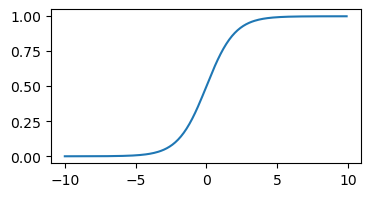

In [ ]:
# sigmoid 시각화
import matplotlib.pyplot as plt
x = np.arange(-10,10,0.1)
y = sigmoid(x)
print(x.shape, y.shape)
plt.figure(figsize=(4,2))
plt.plot(x,y)

- `z1`: `a1`이 **sigmoid function**(활성화함수)를 통과한 결과

In [ ]:
z1 = sigmoid(a1)

In [ ]:
print(z1.shape)

(5, 4)


- **output layer node의 값** `a2` (shape도 확인할 것)

In [ ]:
a2 = z1.dot(W2) + b2

In [ ]:
# a2.shape = (data sample의 수, output layer node의 수)
print(a2.shape)

(5, 3)


- `y`: `a2`가 **sigmoid function**을 통과한 결과

In [ ]:
y = sigmoid(a2)

In [ ]:
print(y)

[[0.41036899 0.66421956 0.39658494]
 [0.3605163  0.67178685 0.44277267]
 [0.34570146 0.68774846 0.43637133]
 [0.48807369 0.62759082 0.36561503]
 [0.49730343 0.61274839 0.37545338]]


In [ ]:
print(y.shape)

(5, 3)


### output layer의 activation function이 softmax일 경우

In [ ]:
a2

array([[-0.36244021,  0.68215525, -0.41971503],
       [-0.57312398,  0.71627788, -0.22991681],
       [-0.63798818,  0.7896141 , -0.25590209],
       [-0.04771431,  0.52189519, -0.55107502],
       [-0.01078639,  0.45887976, -0.50889167]])

In [ ]:
np.exp(a2)
# a2의 각 요소에 exp가 적용된 결과

array([[0.69597592, 1.97813651, 0.65723408],
       [0.56376151, 2.04680057, 0.79459971],
       [0.52835431, 2.20254629, 0.77421777],
       [0.95340613, 1.68521843, 0.57632991],
       [0.98927157, 1.58230044, 0.60116149]])

In [ ]:
# np.exp(a2)의 각요소에 np.exp(a2) 각 행의 합을 나눠야 함
# np.exp(a2).sum(): 모든 원소의 합
# np.exp(a2).sum(axis=0): 각 열에 대해 모든 행의 값을 더한 결과
# np.exp(a2).sum(axis=1): 각 행에 대해 모든 열의 값을 더한 결과
np.exp(a2).sum(axis=1)

array([3.33134652, 3.40516178, 3.50511837, 3.21495447, 3.17273351])

In [ ]:
# np.exp(a2)에 각 행의 합을 나눔
# (a,b)인 2d array와 (b,)인 1d array의 사칙연산은 가능하나
# (a,b)인 2d array와 (a,)인 1d array의 사칙연산은 불가능하므로,
# (a,)인 1d array를 (a,1)인 2d array로 변환하여 연산함
# np.exp(a2)/np.exp(a2).sum(axis=1) -> 오류 발생
np.exp(a2)/np.exp(a2).sum(axis=1).reshape(-1,1)

array([[0.2089173 , 0.59379488, 0.19728782],
       [0.16556086, 0.60108761, 0.23335153],
       [0.15073794, 0.62838   , 0.22088206],
       [0.29655354, 0.52418112, 0.17926534],
       [0.31180418, 0.49871836, 0.18947746]])

- `softmax` 정의

In [ ]:
def softmax(a):
    return np.exp(a)/np.exp(a).sum(axis=1).reshape(-1,1)

In [ ]:
y = softmax(a2)

In [ ]:
y

array([[0.2089173 , 0.59379488, 0.19728782],
       [0.16556086, 0.60108761, 0.23335153],
       [0.15073794, 0.62838   , 0.22088206],
       [0.29655354, 0.52418112, 0.17926534],
       [0.31180418, 0.49871836, 0.18947746]])

In [ ]:
# 각 행에 대해 모든 열의 값 합이 1이 됨을 확인
y.sum(axis=1)

array([1., 1., 1., 1., 1.])